## Read Facebook

In [84]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg

platform='facebook'
root = '/home/jacoponudo/Documents/Size_effects/' 
data = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet')
data.rename(columns={
    'topic': 'page_id',
    'from_id': 'user_id',  # This remains the same
    'post_id': 'post_id',  # This remains the same
    'created_time': 'timestamp'
}, inplace=True)

## Read Facebook

In [1]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
platform='twitter'
root = '/home/jacoponudo/Documents/Size_effects/' 
data = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet')
data.rename(columns={
    'topic': 'page_id',
    'author_id': 'user_id',  # This remains the same
    'post_id': 'post_id',  # This remains the same
    'created_at': 'timestamp'
}, inplace=True)

/home/jacoponudo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read Reddit

In [94]:
import pandas as pd

root = '/home/jacoponudo/Documents/Size_effects/'
platform='reddit'
df = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet',columns=['topic','user_id','post_id','date'])

df.rename(columns={
    'topic': 'page_id',
    'user_id': 'user_id',  # This remains the same
    'post_id': 'post_id',  # This remains the same
    'date': 'timestamp'
}, inplace=True)
data=df
data

,page_id,user_id,post_id,timestamp
0,climatechange,t2_6l4z3,7ndth3,2018-01-01 06:49:06+00:00
1,climatechange,t2_wiu0,7ne93z,2018-01-01 09:59:09+00:00
2,climatechange,t2_mwmugwc,7nf0fb,2018-01-01 12:54:33+00:00
3,climatechange,t2_eq6o6,7ne93z,2018-01-01 13:58:32+00:00
4,climatechange,t2_51cb9,7ne93z,2018-01-01 14:41:15+00:00
...,...,...,...,...
1853618,vaccines,t2_cu1l3alr,o5l0n8,2022-11-02 04:24:47+00:00
1853619,vaccines,t2_6l4z3,o5l0n8,2022-11-06 03:12:37+00:00
1853620,vaccines,t2_qsub24zn,o5l0n8,2022-11-06 03:17:14+00:00
1853621,vaccines,t2_2bbv0vl9,o5l0n8,2022-11-06 15:03:29+00:00


## Read Voat

In [95]:
from tools.to_read import *
from tools.to_plot import *
from tools.to_do import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.image as mpimg
root = '/home/jacoponudo/Documents/Size_effects/'
platform='voat'
df = pd.read_parquet(root + 'DATA/' + platform + '/' + platform + '_raw_data.parquet',columns=['topic','user','root_submission','created_at'])

df.rename(columns={
    'topic': 'page_id',
    'user': 'user_id',  # This remains the same
    'root_submission': 'post_id',  # This remains the same
    'created_at': 'timestamp'
}, inplace=True)
data=df

## Processing

In [97]:
df=data
# Assicurati che la colonna 'timestamp' sia di tipo datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Aggiungi una colonna 'week' che rappresenta la settimana dell'anno
df['week'] = df['timestamp'].dt.to_period('d')


# Raggruppa per 'page_id', 'week' e calcola il numero di utenti univoci per ogni combinazione
weekly_unique_users = df.groupby(['page_id', 'week'])['user_id'].nunique().reset_index()



# Rinominare la colonna per maggiore chiarezza
weekly_unique_users.rename(columns={'user_id': 'unique_users_count'}, inplace=True)

# Ordinare per 'page_id' e 'week' (assicurarsi che i dati siano in ordine)
weekly_unique_users = weekly_unique_users.sort_values(by=['page_id', 'week'])

# Aggiungere la media mobile a 3 settimane (o a una finestra che preferisci)
weekly_unique_users['smoothed_users_count'] = weekly_unique_users.groupby('page_id')['unique_users_count'].rolling(window=30, min_periods=1).mean().reset_index(level=0, drop=True)

# Mostrare i primi risultati
print(weekly_unique_users.head())

weekly_unique_users.to_csv("/home/jacoponudo/Documents/Size_effects/PAPER/output/4_section/ts_outreach.csv", index=False)

/tmp/ipykernel_14007/391598808.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week'] = df['timestamp'].dt.to_period('d')


      page_id        week  unique_users_count  smoothed_users_count
0  Conspiracy  2018-01-09                   4              4.000000
1  Conspiracy  2018-01-10                   3              3.500000
2  Conspiracy  2018-01-11                  12              6.333333
3  Conspiracy  2018-01-12                   6              6.250000
4  Conspiracy  2018-01-13                   8              6.600000


## Verbosity - Method 1

In [109]:


from tools.to_do import *

# Raggruppiamo per 'post_id' e 'page_id' e otteniamo il timestamp minimo per ogni gruppo
posts = data.groupby(['post_id', 'page_id'])['timestamp'].min().reset_index()

# Convertiamo 'timestamp' in formato datetime
posts['timestamp'] = pd.to_datetime(posts['timestamp'])

# Creiamo una colonna 'week' che rappresenta la settimana del 'timestamp'
posts['week'] = posts['timestamp'].dt.to_period('d')

# Raggruppiamo per 'user_id' e 'post_id' per calcolare il numero di commenti per ogni post
comments = data.groupby(['user_id', 'post_id']).size().reset_index(name='comment_count')

# Impostiamo un limite per i commenti (se ci sono più di 5 commenti, li limitamo a 5)
comments['comment_count'] = comments['comment_count'].apply(lambda x: 5 if x > 5 else x)

# Calcoliamo la distribuzione di probabilità dei commenti per ogni post
prob_dist = comments.groupby(['post_id'])['comment_count'].value_counts(normalize=True)

# Calcoliamo il parametro di localizzazione per ogni post_id
localization_results = prob_dist.groupby(['post_id']).apply(lambda x: calculate_localization_parameter(x.values)).reset_index(name='localization_parameter')

# Aggiungiamo la colonna 'localization_parameter' al DataFrame 'posts' tramite un merge su 'post_id'
posts = posts.merge(localization_results[['post_id', 'localization_parameter']], on='post_id', how='left')

 


/tmp/ipykernel_14007/677518029.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts['week'] = posts['timestamp'].dt.to_period('d')


## Verbosity - Method 2

In [98]:


from tools.to_do import *

# Raggruppiamo per 'post_id' e 'page_id' e otteniamo il timestamp minimo per ogni gruppo
posts = data.groupby(['post_id', 'page_id'])['timestamp'].min().reset_index()

# Convertiamo 'timestamp' in formato datetime
posts['timestamp'] = pd.to_datetime(posts['timestamp'])

# Creiamo una colonna 'week' che rappresenta la settimana del 'timestamp'
posts['week'] = posts['timestamp'].dt.to_period('d')

# Raggruppiamo per 'user_id' e 'post_id' per calcolare il numero di commenti per ogni post
# Grouping by 'user_id' and 'post_id' to count the comments
# Sorting comments by user_id and post_id
data = data.sort_values(by=['user_id', 'post_id', 'timestamp'])

# Adding comment count for each user and post
data = data.merge(data.groupby(['user_id', 'post_id']).size().reset_index(name='comment_count')[['user_id', 'post_id', 'comment_count']], on=['user_id', 'post_id'], how='left')

# Marking the last comment for each user and post
data['is_last_comment'] = data.groupby(['user_id', 'post_id'])['timestamp'].transform('last') == data['timestamp']
posts = data.groupby(['page_id', 'post_id', 'week'])['is_last_comment'].mean().reset_index()
posts

/tmp/ipykernel_14007/2513271468.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  posts['week'] = posts['timestamp'].dt.to_period('d')


,page_id,post_id,week,is_last_comment
0,Conspiracy,0,2018-01-30,1.0
1,Conspiracy,0,2018-03-11,1.0
2,Conspiracy,0,2018-04-07,0.0
3,Conspiracy,0,2018-04-13,1.0
4,Conspiracy,0,2018-07-21,1.0
...,...,...,...,...
582709,Politics,999945,2016-04-24,0.0
582710,Politics,999945,2016-04-26,0.0
582711,Politics,999945,2016-04-30,0.5
582712,Politics,999945,2016-05-02,1.0


## Merge

In [99]:
merged_df = pd.merge(weekly_unique_users, posts, on=['page_id',  'week'], how='right')

# 'how' può essere 'inner', 'left', 'right' o 'outer' a seconda di come vuoi che vengano gestiti i valori non corrispondenti

# Mostriamo il risultato del merge
print(merged_df)


           page_id        week  unique_users_count  smoothed_users_count  \
0       Conspiracy  2018-01-30                  39             16.636364   
1       Conspiracy  2018-03-11                  52             41.933333   
2       Conspiracy  2018-04-07                  74             50.333333   
3       Conspiracy  2018-04-13                  52             50.633333   
4       Conspiracy  2018-07-21                  37             44.166667   
...            ...         ...                 ...                   ...   
582709    Politics  2016-04-24                 125            183.866667   
582710    Politics  2016-04-26                 197            183.166667   
582711    Politics  2016-04-30                 137            174.100000   
582712    Politics  2016-05-02                 149            173.833333   
582713    Politics  2016-04-23                 104            189.633333   

       post_id  is_last_comment  
0            0              1.0  
1            0     

## Plot

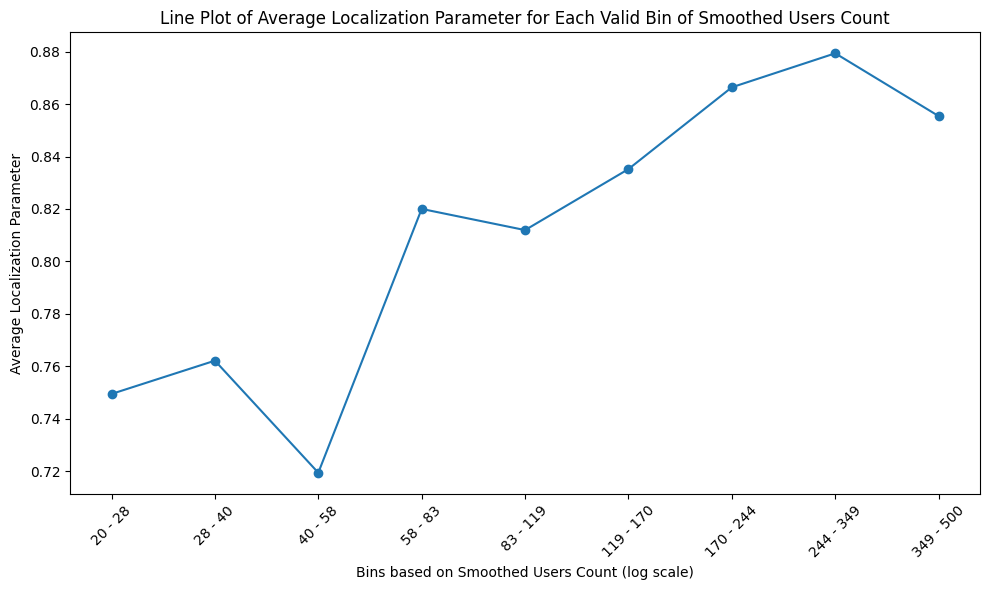

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Creazione dei bins logaritmici
bin_start = 20
bin_end =500

# Calcolare i limiti dei bins utilizzando logaritmi (log base 10)
bins = np.logspace(np.log10(bin_start), np.log10(bin_end), num=10)

# Aggiunta di una colonna per il bin in cui si trova ogni valore
merged_df['binned'] = pd.cut(merged_df['smoothed_users_count'], bins, right=False)

# Filtriamo i bins che hanno meno di 100 osservazioni
binned_counts = merged_df['binned'].value_counts()
valid_bins = binned_counts[binned_counts >= 100].index

# Ordiniamo i bins in base al limite sinistro
valid_bins = sorted(valid_bins, key=lambda bin_: bin_.left)

# Calcolo del valore medio di 'localization_parameter' per ogni bin valido
mean_values = [
    merged_df[merged_df['binned'] == bin_]['is_last_comment'].mean()
    for bin_ in valid_bins
]

# Creazione del line plot
plt.figure(figsize=(10, 6))

# Disegno del grafico a linee
plt.plot(np.arange(len(valid_bins)), mean_values, marker='o', linestyle='-')

# Etichette per i bins
bin_labels = [f'{int(bin_.left)} - {int(bin_.right)}' for bin_ in valid_bins]
plt.xticks(np.arange(len(valid_bins)), bin_labels, rotation=45)

# Aggiunta delle etichette agli assi
plt.xlabel('Bins based on Smoothed Users Count (log scale)')
plt.ylabel('Average Localization Parameter')

# Titolo del grafico
plt.title('Line Plot of Average Localization Parameter for Each Valid Bin of Smoothed Users Count')

# Mostra il grafico
plt.tight_layout()
plt.show()
